# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [1]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

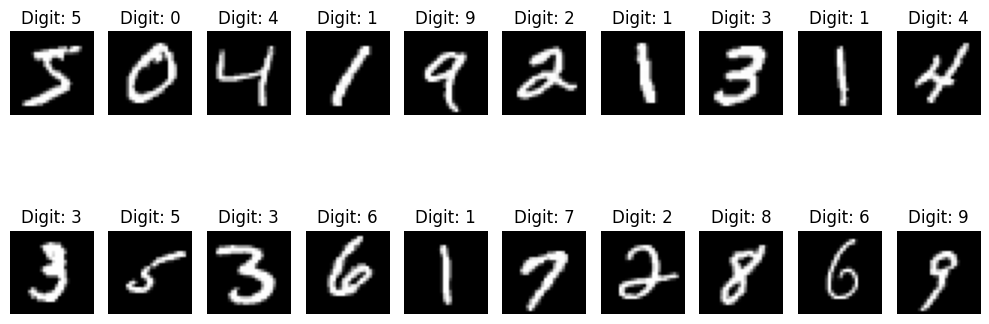

In [2]:
import matplotlib.pyplot as plt

fig, axes_array = plt.subplots(nrows=2, ncols=10, figsize=(10, 5))
axes_flattened = axes_array.flat

for idx, ax in enumerate(axes_flattened):
    image = X[idx].reshape(28, 28)
    digit = y[idx]

    ax.imshow(image, cmap='grey')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Explanation of Code

The line `plt.subplots(2, 10, figsize=(10, 5))` Creates a 2x10 grid for displaying the first 20 digits. The `fig` object contains all subplots and `axes_array` is a 2D array of subplot axes (individual panels). `axes_flattened` flattens the array to a 1D array, making it easier to iterate through.

The for loop loops through each digit in the grid (20 times) and displays the images. The images are visualised by reshapping every flattened pixel array into a 28x28 grid with the line ` X[idx].reshape(28, 28)`.

The `tight_layout()` function ensures the labels and images do not overlap.

## Reasoning for Process Decisions

The for loop is essential for iterating through the 20 digits in the MNIST dataset. The loop simplifies repetitive tasks (displaying multiple images and labels). This also helps make the visualisation more efficient.

## Analysis

By visualising the digits and their labels, we can confirm that the images are legible and correctly labeled.

In observation, the digits appear to be a little blurry which is likely due to the resolution being limited to 28x28 pixels.

Each digit in the subplots vary differently in style and orientation.

### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

X_small, _, y_small, _ = train_test_split(X, y, train_size=0.1, random_state=44, stratify=y)

# Scale the dataset
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

log_reg = LogisticRegression(penalty="l1", solver="saga", C=0.1, max_iter=500)
log_reg.fit(X_small_scaled, y_small)

y_pred = log_reg.predict(X_small_scaled)
accuracy = accuracy_score(y_small, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_small, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.9391428571428572
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       690
           1       0.94      0.98      0.96       788
           2       0.94      0.93      0.94       699
           3       0.94      0.92      0.93       714
           4       0.93      0.95      0.94       682
           5       0.93      0.89      0.91       631
           6       0.96      0.98      0.97       688
           7       0.95      0.94      0.94       729
           8       0.91      0.89      0.90       683
           9       0.93      0.93      0.93       696

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



In [4]:
sparsity = np.mean(log_reg.coef_ == 0) * 100
print(f"Sparsity of Weight Vectors: {sparsity:.2f}%")

Sparsity of Weight Vectors: 76.63%


## Explanation

1.   Data subsetting:

    *   The dataset is reduced to 10% of its original size using `train_size=0.1`.
    *   The reason for this is to reduce the training time while retaining the overall class distribution.

2.   Scaling:

    *  The `StandardScaler` is applied to standardize the data, transforming features to have zero mean and unit variance.
    * This is to ensure that the features contribute equally to the model training and enhance the performance and optimisation process.

3. Training the Logistic Regression Model:

    *   L1 Regularisation (`penalty="l1"`): Promotes sparsity in the weight vectors, making the model simpler and more interpretable.
    *  Regularisation Strength (`C=0.1`): Controls the strength of regularisation. Lower values of C apply stronger regularisation, which encourages more sparsity in the weights.
    * Max Iterations (`max_iter=500`): Limits the number of optimisation iterations to save computational time.

4. Prediction and Evaluation:

   * Accuracy calculates the proportion of thecorrectly predicted samples.
   * The classification report provides a detailed breakdown of model performance for each class.


## Findings

1. Sparcity of Weight Vectors:
  * The L1 regularization successfully enforces sparsity, as many regions (pixels) have neutral weights (close to zero). This sparsity simplifies the model and emphasizes only the most important pixels. The sparsity of the weight vectors reported at 76.63%.

2. Overall Accuracy:
  * The model achieved an accuracy of **93.9%** on the subset of the MNIST dataset after running for around 5 minutes.

3. Class-Specific Performance:
  * Digits like 0, 1, and 6 have particularly high precision, recall, and F1-scores, indicating they are easier for the model to distinguish.
  * Whereas, the digit 8 has a slightly lower precision *(0.91)* and F1-score *(0.90)*, indicating it is more frequently confused with other digits.







## Tuning the Hyperparameters

In [5]:
param_distributions = {
    'penalty': ['l1'],
    'C': [0.01, 0.1, 0.5],
    'solver': ['saga']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=500, random_state=44),
    param_distributions=param_distributions, n_iter=3, cv=3, verbose=2,
    random_state=44, n_jobs=-1
)

random_search.fit(X_small_scaled, y_small)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_
y_best_pred = best_model.predict(X_small_scaled)
print(f"Best Model Accuracy: {accuracy_score(y_small, y_best_pred)}")
print(classification_report(y_small, y_best_pred))

# RandomizedSearchCV adapted from: https://scikit-learn.org/0.22/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.5}
Best Model Accuracy: 0.9641428571428572
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       690
           1       0.97      0.99      0.98       788
           2       0.97      0.96      0.97       699
           3       0.96      0.95      0.95       714
           4       0.95      0.97      0.96       682
           5       0.95      0.94      0.94       631
           6       0.99      0.98      0.99       688
           7       0.97      0.97      0.97       729
           8       0.94      0.93      0.94       683
           9       0.96      0.96      0.96       696

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000



In [6]:
sparsity = np.mean(best_model.coef_ == 0) * 100
print(f"Sparsity of Weight Vectors: {sparsity:.2f}%")

Sparsity of Weight Vectors: 51.16%


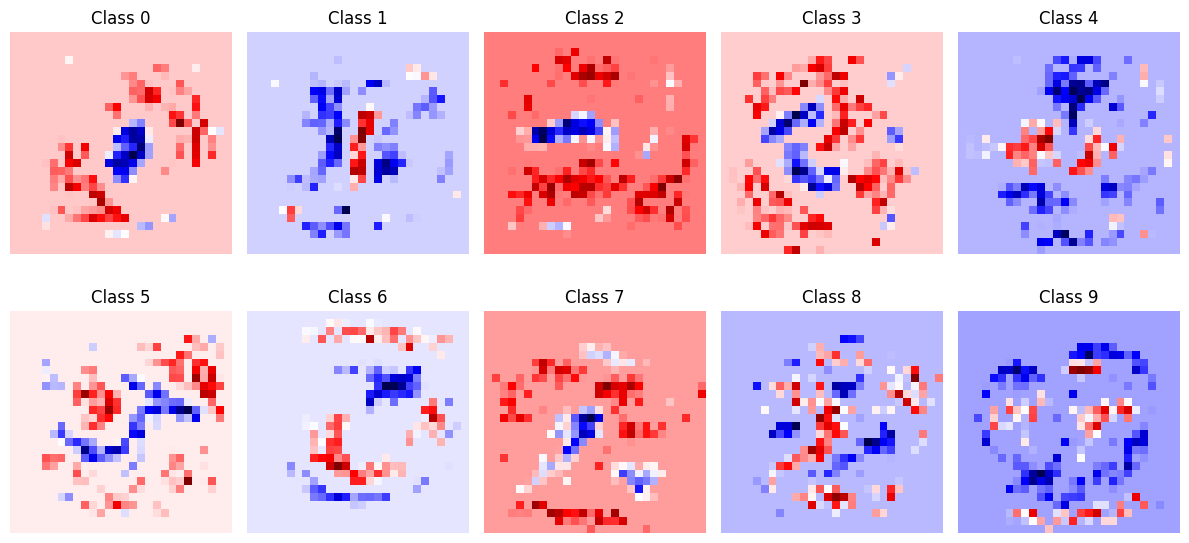

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

weights = log_reg.coef_
for i in range(10):
    axes[i].imshow(weights[i].reshape(28, 28), cmap='seismic', interpolation='none')
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")

plt.tight_layout()
plt.show()

A hyperparameter search was performed for the Logistic Regression model using RandomizedSearchCV.

### Reasoning for using RandomizedSearchCV
Randomized search is computationally more efficient compared to a grid search because it samples from the hyperparameter space rather than searching every combinations.


## Analysis of the Results

* High accuracy demonstrates that the model captures key structural features of each digit well.
* The sparsity induced by L1 regularization ensures interpretability and efficiency.
* The slight drop in metrics for certain digits  suggests the model struggles with digits that share overlapping features with others.

The sparsity of weight vectors after tuning the hyperparameters was reported at 51.16%. Despite the model's high accuracy, the low sparsity may come at a cost of potentially discarding relevant information, which may affect performance.

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
X_pca = pca.fit_transform(X_small)

print(f"Number of components explaining 80% variance: {pca.n_components_}")

# Adapted from: https://www.kaggle.com/code/vipulgandhi/pca-beginner-s-guide-to-dimensionality-reduction

Number of components explaining 80% variance: 43


The code outputs that **43 components** are needed to explain 80% of the variance. This is much less than the original 784 features, indicating that most of the information can be captured with just a small number of components.

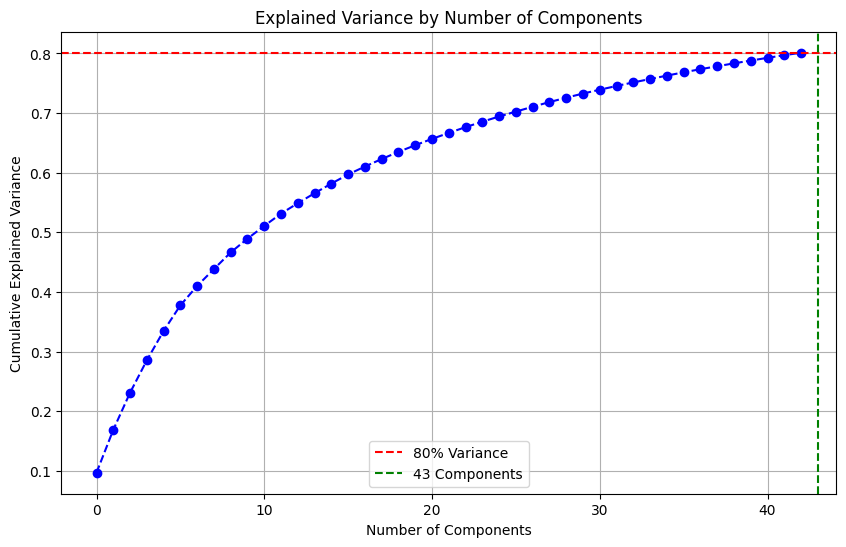

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% Variance")
plt.axvline(x=pca.n_components_, color='g', linestyle='--', label=f"{pca.n_components_} Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.legend()
plt.grid()
plt.show()

The plot shows how much of the data's variance is explained as we add more components. As we increase the number of components, the explained variance increases.

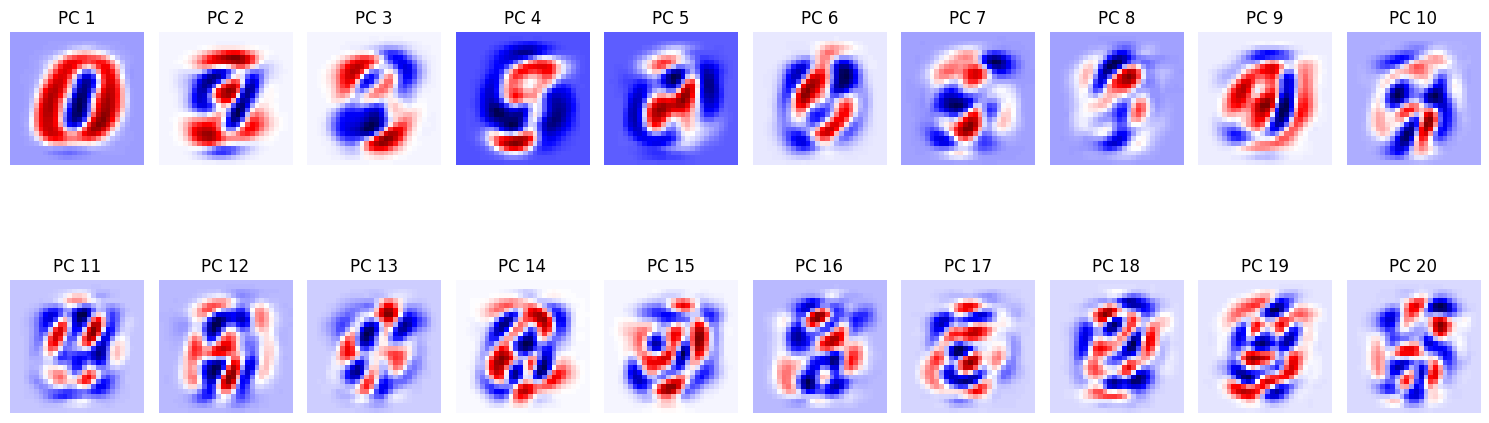

In [10]:
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='seismic')
    plt.title(f"PC {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

The first 20 principal components' loadings are visualised as images. This helps us understand what features the PCA algorithm has learned from the data.
The color scheme (`seismic`) highlights positive and negative contributions:
* Red: Indicates positive weights.
* Blue: Indicates negative weights.

`pca.components_[i].reshape(28, 28)` reshapes the 1D array representing each PC back into a 28x28 grid to align with the MNIST data's image dimensions.

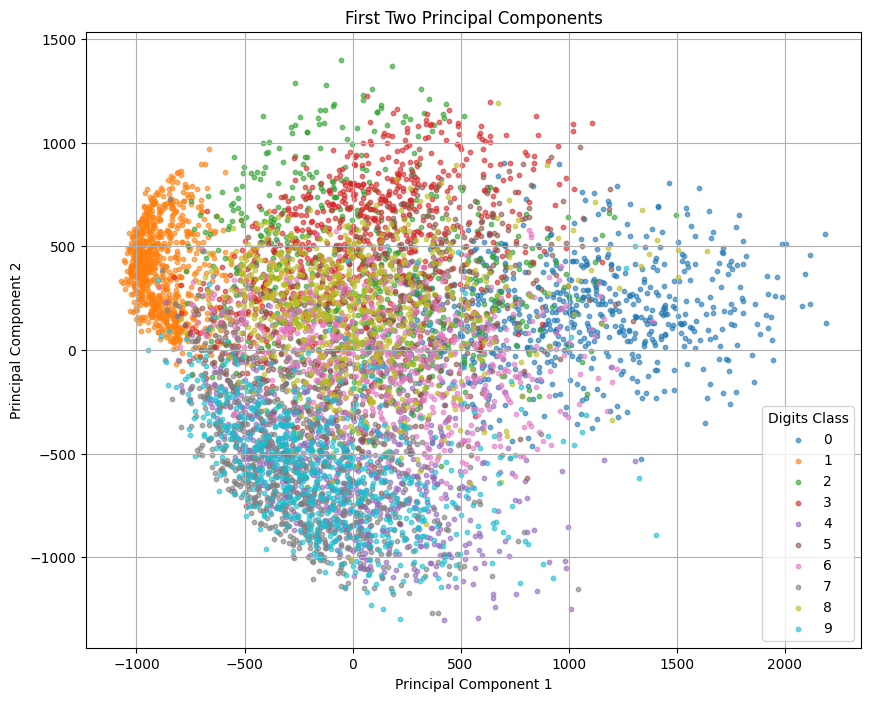

In [11]:
plt.figure(figsize=(10, 8))
for digit in np.unique(y_small):
    mask = y_small == digit
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=digit, alpha=0.6, s=10)

plt.title("First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digits Class")
plt.grid()
plt.show()

This scatterplot visualizes the first two principal components for the MNIST dataset, with points colour-coded by digit class.

### Observations
Digits like 0 and 1 form distinct and tight clusters, meaning they are easy to tell apart using the first two components.
Digits like 8, 6, and 5 overlap a lot, making it harder to separate them. Likely because they share similar stokes and curves. Majority of the points are gathered up in the middle, showing that some digits are not well-seperated.

This plot is helpful for getting a general sense of how the digits relate to each other but shows the limits of using only two components for distinguishing all the digits.

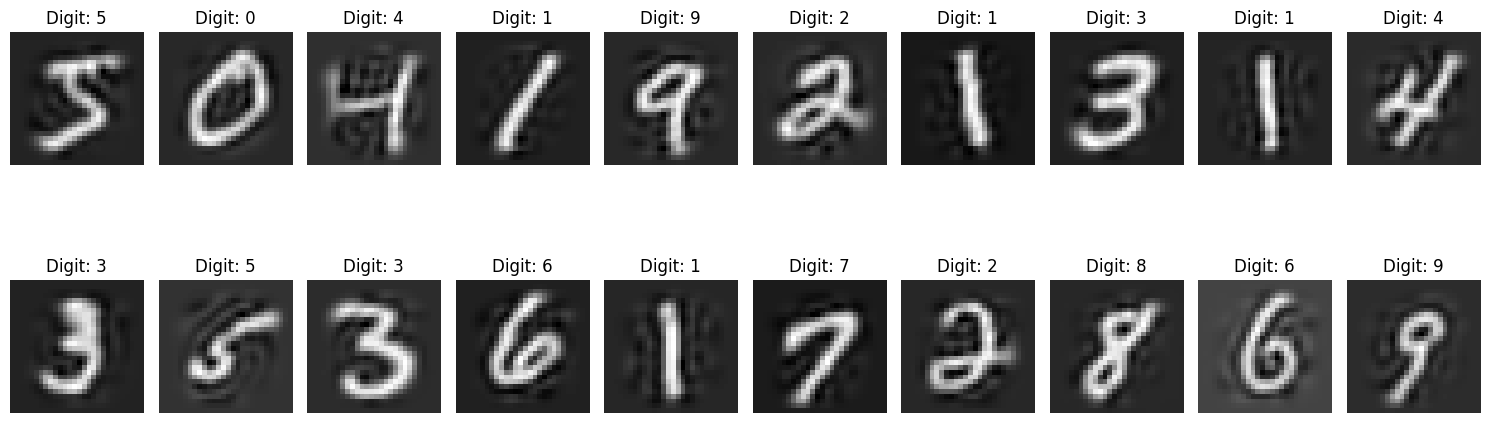

In [12]:
pca_80 = PCA(80)
X_small_reduced = pca_80.fit_transform(X)
X_reconstructed = pca_80.inverse_transform(X_small_reduced)

plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='grey')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

By reducing the data to two components, we were able to visualize how each digit is represented in this reduced space.
The reconstructed digits retain their general shapes but lose fine-grained details due to dimensionality reduction.

## Explanation
* PCA: `PCA(0.80)` selects the minimum number of components required to explain 80% of the dataset's variance.
* Visualising the explained variance: The vertical line marks the number of components required to explain 80% of the variance, and the horizontal line denotes the 80% threshold.
* Visualise the digits generated from lower dimentional representation: Reconstructed the original data using the components that explain 80% variance. In this way, the balance between reconstruction quality and dimensionality reduction is evaluated.

## Analysis
PCA found that 80% of the variance in the dataset may be captured by a very small number of components. This suggests that dimensionality may be effectively reduced and that the MNIST dataset has significant redundancy.

Although they lose finer details, the reconstructed digits are similar to the original digits. For instance, it could become harder to distinguish small differences between numbers that are visually similar (like 3 and 5). It is expected because of the reduction in dimensionality.


### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

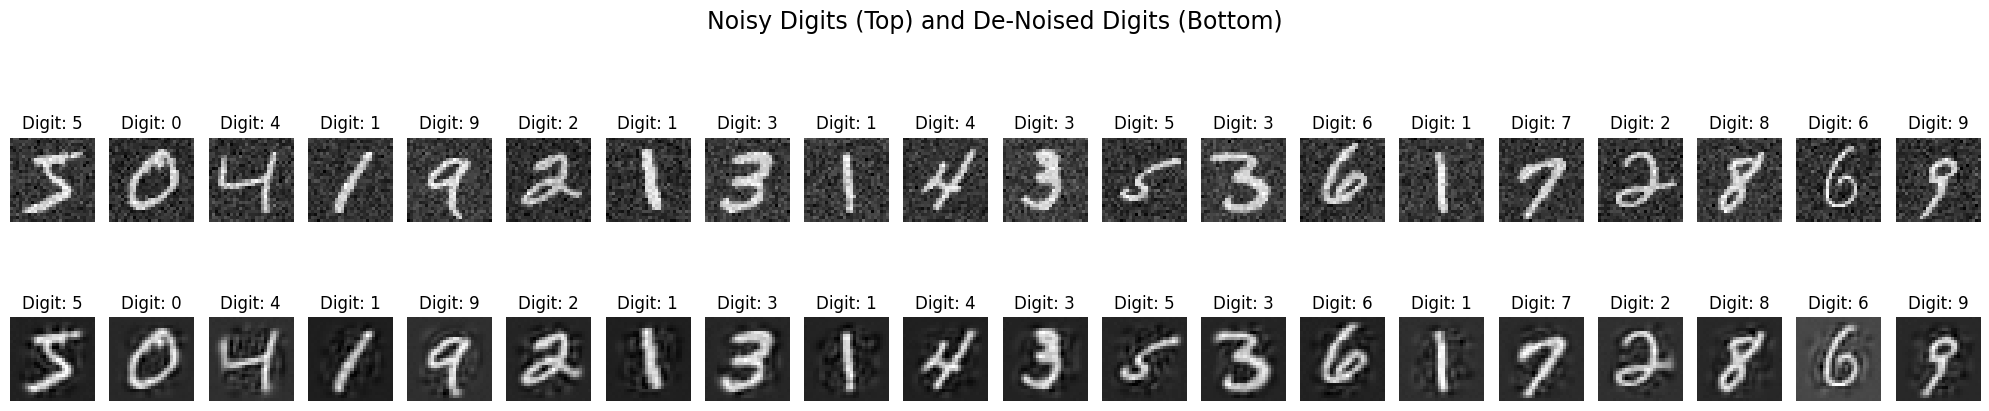

In [13]:
X_normalized = X / 255

noise_scale = 0.1
rng = np.random.RandomState(44)
X_noisy = X_normalized + rng.normal(scale=noise_scale, size=X_normalized.shape)

pca = PCA(0.85)
X_noisy_reduced = pca.fit_transform(X_noisy)
X_denoised = pca.inverse_transform(X_noisy_reduced)

fig, axes = plt.subplots(2, 20, figsize=(20, 5))

# First 20 Noisy Digits
for i in range(20):
    ax = axes[0, i]
    ax.imshow(X_noisy[i].reshape(28, 28), cmap='grey')
    ax.axis('off')
    ax.set_title(f"Digit: {y[i]}")

# First 20 De-Noised Digits
for i in range(20):
    ax = axes[1, i]
    ax.imshow(X_denoised[i].reshape(28, 28), cmap='grey')
    ax.axis('off')
    ax.set_title(f"Digit: {y[i]}")

plt.suptitle("Noisy Digits (Top) and De-Noised Digits (Bottom)", fontsize=17)
plt.tight_layout()
plt.show()

## Explanation

### Normalise the dataset
First we normalised the dataset X by dividing it by 255. This is crucial as it ensures that noise addition and PCA processing are applied to scaled values.

### Adding noise
Added noise using np.random with a noise scale of `0.1`

### Noise Reduction with PCA
Applied PCA to reduce the noise generated. Retained 85% of the variance in the data.

In order to reconstruct the denoised data, noisy data was first transformed into the reduced PCA space and then inversely transformed.
By combining only the important components that were kept during PCA, the inverse transformation attempts to reconstruct the original signal.

## Reasoning for Process Decisions

* Normalisation: It is essential to normalise the dataset to ensure consitent handling of data.
* Scaling Noise: Used the value 0.1 to scale the noise because it maintains the digits' fundamental shape for effective denoising while guaranteeing visible distortion.
* Variance Retention: 85% was chosen as it balances denoising and maintainig sufficient detail in the reconstructed data.

## Analysis

* The noisy digits in the top row show clear distortion but retain their structure. making them readable. This validates the noise does not overwhelm the original signal.
* The de-noised digits in the bottom row are less noisy but blurry and still has some visible residue. This validates that the PCA is effective but may benefit with a higher variance level (90-95%).